In [10]:
import os
import sys

python_working_dir = !pwd
package_path = '/'.join(python_working_dir[0].split('/')[:-1])
print(package_path)

sys.path.append(package_path)

import shap
import pandas as pd

from fraud_prevention import config

X_PATH = os.path.join(
    config.PRJ_DIR,
    'models/data.parquet')


/Users/luis.sanchez/conekta/project


In [5]:
data = pd.read_parquet(X_PATH)

In [14]:
data.query('name == "test"')['y_score'].hist(bins=100)

UndefinedVariableError: name 'name' is not defined

In [33]:
threshold_table_regular = threshold_table_module.compute(
    y_true=data['y_true'], 
    y_score=data['y_score'],
    cc_id=pd.Series(range(0, y_scores.shape[0])),
    weight=None)

In [36]:
threshold_table_regular['rejected_nb_fraud']

min_score
0.000    321
0.001      1
0.002      0
0.003      0
0.004      0
        ... 
0.981      0
0.982      0
0.983      0
0.984      0
0.985      0
Name: rejected_nb_fraud, Length: 95, dtype: int64

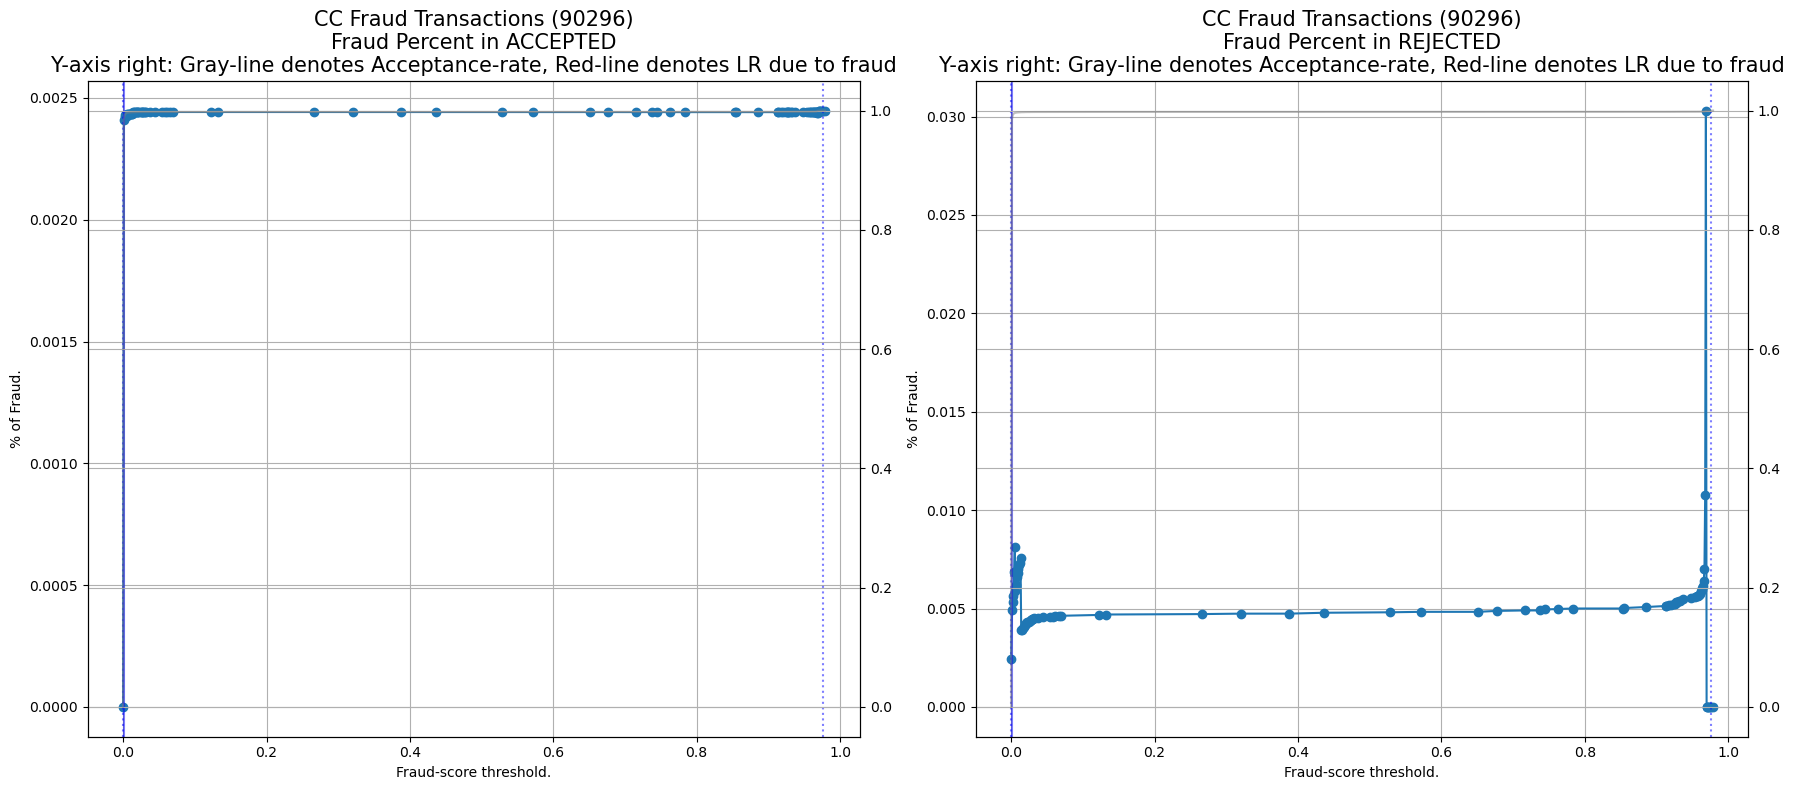

In [15]:
fig, ax = threshold_table_module.plot(
    cut_table=threshold_table_regular,
    accept_th=None, 
    reject_th=None, 
    title='CC Fraud Transactions')